# 1. セットアップ

In [1]:
!git clone https://github.com/ultralytics/yolov5
!mv yolov5/* .

Cloning into 'yolov5'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 1297 (delta 32), reused 32 (delta 15), pack-reused 1238
Receiving objects: 100% (1297/1297), 3.54 MiB | 14.67 MiB/s, done.
Resolving deltas: 100% (862/862), done.


In [2]:
!pip install numpy==1.17
!pip install opencv-python-headless
!pip install torch==1.5.1
!pip install matplotlib
!pip install pillow
!pip install tensorboard
!pip install PyYAML==5.3
!pip install torchvision==0.6.1
!pip install scipy
!pip install tqdm

     |████████████████████████████████| 36.4 MB 6.7 MB/s eta 0:00:01
  Using cached torch-1.5.1-cp36-cp36m-manylinux1_x86_64.whl (753.2 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.2.0
    Uninstalling torch-1.2.0:
      Successfully uninstalled torch-1.2.0
     |████████████████████████████████| 268 kB 7.3 MB/s eta 0:00:01
  Created wheel for PyYAML: filename=PyYAML-5.3-cp36-cp36m-linux_x86_64.whl size=44229 sha256=16985c82226df75b7c365fa0b09e913e29089e4beb63d75a4d28bd63c4595ad0
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b1/86/0d/10e6c39d3a2b85ba807d7657ee80f08cc16c03f2aa2adf8e46
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.1.2
ERROR: Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
     |████████████████████████████████| 6.6 MB 6.1 MB/s eta 0:00:01


# 2. 学習済みモデルでテスト

In [3]:
!python detect.py --weights yolov5s.pt --img 416 --conf 0.4 --source ./inference/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', update=False, view_img=False, weights=['yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=12206MB)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1009      0 --:--:-- --:--:-- --:--:--  1009
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 14.4M    0 14.4M    0     0  14.4M      0 --:--:--  0:00:01 --:--:-- 47.5M
Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 7.45958e+06 gradients
image 1/2 inference/images/bus.jpg: 416x352 3 persons, 1 buss, Done. (0.024s)
image 2/2 inference/images/zidane.

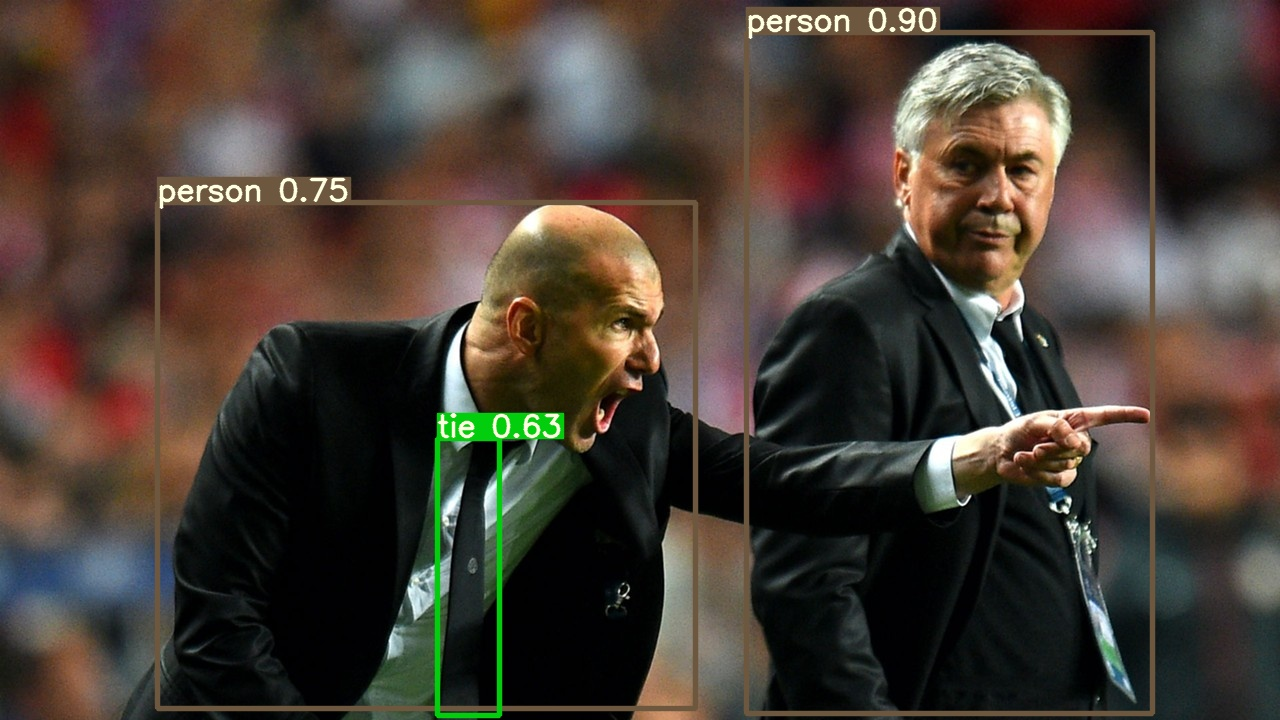

In [4]:
from IPython.display import Image
Image(filename='inference/output/zidane.jpg', width=600)

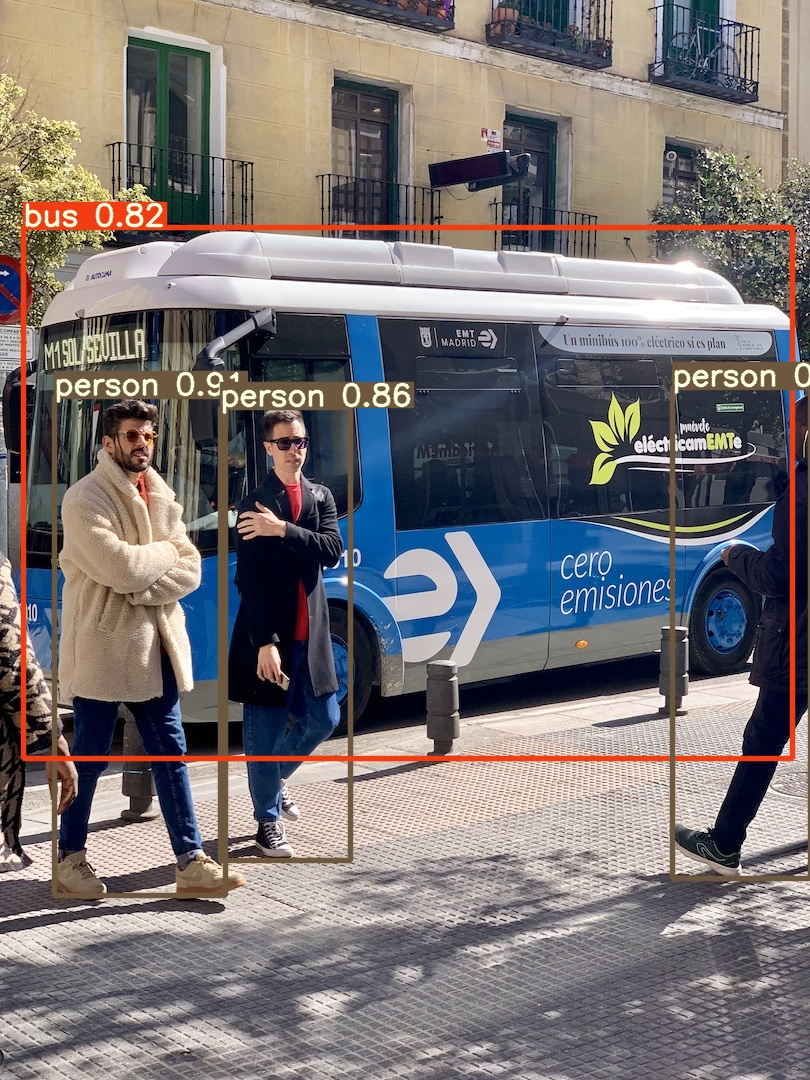

In [5]:
Image(filename='inference/output/bus.jpg', width=600)

# 3. 自前のデータで学習

### データの取得

In [6]:
%%bash
wget https://raw.githubusercontent.com/schiyoda/ws-yolov5/master/watson_logos.zip
wget https://raw.githubusercontent.com/schiyoda/ws-yolov5/master/watson.yaml -O data/watson.yaml
unzip watson_logos.zip

Archive:  watson_logos.zip
   creating: watson_logos/
   creating: watson_logos/test/
   creating: watson_logos/images/
   creating: watson_logos/labels/
  inflating: watson_logos/test/test_00.jpg  
  inflating: watson_logos/test/test_01.jpg  
  inflating: watson_logos/test/test_03.jpg  
  inflating: watson_logos/test/test_02.jpg  
  inflating: watson_logos/test/.DS_Store  
  inflating: watson_logos/images/img_10.jpg  
  inflating: watson_logos/images/img_04.jpg  
  inflating: watson_logos/images/img_38.jpg  
  inflating: watson_logos/images/img_39.jpg  
  inflating: watson_logos/images/img_05.jpg  
  inflating: watson_logos/images/img_11.jpg  
  inflating: watson_logos/images/img_07.jpg  
  inflating: watson_logos/images/img_13.jpg  
  inflating: watson_logos/images/img_12.jpg  
  inflating: watson_logos/images/img_06.jpg  
  inflating: watson_logos/images/img_02.jpg  
  inflating: watson_logos/images/img_16.jpg  
  inflating: watson_logos/images/img_17.jpg  
  inflating: watson_logos

--2020-07-09 04:59:45--  https://raw.githubusercontent.com/schiyoda/ws-yolov5/master/watson_logos.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4878516 (4.7M) [application/zip]
Saving to: ‘watson_logos.zip’

     0K .......... .......... .......... .......... ..........  1% 18.3M 0s
    50K .......... .......... .......... .......... ..........  2% 12.5M 0s
   100K .......... .......... .......... .......... ..........  3% 15.3M 0s
   150K .......... .......... .......... .......... ..........  4% 18.3M 0s
   200K .......... .......... .......... .......... ..........  5% 18.2M 0s
   250K .......... .......... .......... .......... ..........  6% 17.3M 0s
   300K .......... .......... .......... .......... ..........  7% 25.0M 0s
   350K .......... .......... .......... .......... .......... 

### TensorBoardの表示
- セル実行後に表示されるリンク(http://xxx.ngrok.io)をクリック

In [7]:
!rm -fr ngrok
LOG_DIR = './runs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 6006 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2020-07-09 04:59:47--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.233.91.203, 52.54.124.219, 3.90.94.177, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.233.91.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  35.2MB/s    in 0.4s    

2020-07-09 04:59:48 (35.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://696b8eba1300.ngrok.io


### 学習

In [8]:
!python train.py --img 512 --batch 2 --epochs 100 --data ./data/watson.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(batch_size=2, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='./data/watson.yaml', device='', epochs=100, evolve=False, hyp='', img_size=[512], multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=12206MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Hyperparameters {'optimizer': 'SGD', 'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Overriding ./models/yolov5s.yaml nc=80 with nc=2

                 from  n    params  module                          

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 24.91it/s]
                 all          65          79      0.0726       0.747       0.232      0.0544

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
      7/99    0.614G   0.07796   0.05135   0.02651    0.1558         2       512: 100%|█| 33/33 [00:03<00:00,  9.64it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 24.69it/s]
                 all          65          79       0.127       0.715       0.273      0.0686

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
      8/99    0.614G   0.06364   0.04178   0.02534    0.1308         3       512: 100%|█| 33/33 [00:03<00:00,  9.03it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 24.47it/s]
         

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 25.24it/s]
                 all          65          79       0.177       0.785       0.271      0.0779

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     26/99    0.614G   0.07981   0.03058  0.009795    0.1202         1       512: 100%|█| 33/33 [00:03<00:00,  9.45it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 23.93it/s]
                 all          65          79       0.168       0.896       0.395       0.113

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     27/99    0.614G   0.07453   0.03728  0.008574    0.1204         4       512: 100%|█| 33/33 [00:03<00:00,  9.27it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 25.38it/s]
         

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 22.75it/s]
                 all          65          79       0.331           1        0.79       0.351

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     45/99    0.614G   0.04972    0.0293  0.006149   0.08518         2       512: 100%|█| 33/33 [00:03<00:00,  9.10it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 25.23it/s]
                 all          65          79       0.321           1       0.934       0.501

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     46/99    0.614G    0.0511   0.03562  0.005407   0.09213         4       512: 100%|█| 33/33 [00:03<00:00,  9.88it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 25.49it/s]
         

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 22.40it/s]
                 all          65          79        0.59           1       0.959       0.538

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     64/99    0.614G   0.03169   0.02658  0.003875   0.06215         1       512: 100%|█| 33/33 [00:03<00:00,  8.97it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 22.46it/s]
                 all          65          79       0.746           1       0.993       0.678

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     65/99    0.614G   0.03476    0.0293  0.004241    0.0683         2       512: 100%|█| 33/33 [00:03<00:00,  9.29it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 25.89it/s]
         

               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 25.50it/s]
                 all          65          79       0.858           1       0.995       0.811

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     83/99    0.614G   0.02365   0.02253  0.002697   0.04889         2       512: 100%|█| 33/33 [00:03<00:00,  9.25it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 24.75it/s]
                 all          65          79       0.872           1       0.995       0.801

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     84/99    0.614G   0.02079   0.02014   0.00479   0.04572         0       512: 100%|█| 33/33 [00:03<00:00,  9.44it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100%|█| 33/33 [00:01<00:00, 25.44it/s]
         

### テスト

In [12]:
!python detect.py --weights runs/Jul09_04-59-53_notebook-gpupy360159d5c2977540fda0035e100a6da2c3-669ff8765zljlh/weights/best.pt --img 416 --conf 0.8 --source ./watson_logos/test/ --output output/ --save

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.8, device='', img_size=416, iou_thres=0.5, output='output/', save_txt=True, source='./watson_logos/test/', update=False, view_img=False, weights=['runs/Jul09_04-59-53_notebook-gpupy360159d5c2977540fda0035e100a6da2c3-669ff8765zljlh/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=12206MB)

Fusing layers... Model Summary: 140 layers, 7.24922e+06 parameters, 6.61683e+06 gradients
image 1/4 watson_logos/test/test_00.jpg: 288x416 1 watson_otherss, Done. (0.023s)
image 2/4 watson_logos/test/test_01.jpg: 288x416 1 watson_otherss, Done. (0.021s)
image 3/4 watson_logos/test/test_02.jpg: 160x416 1 watsons, Done. (0.021s)
image 4/4 watson_logos/test/test_03.jpg: 416x352 1 watsons, Done. (0.023s)
Results saved to /home/wsuser/work/output/
Done. (0.188s)


In [13]:
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

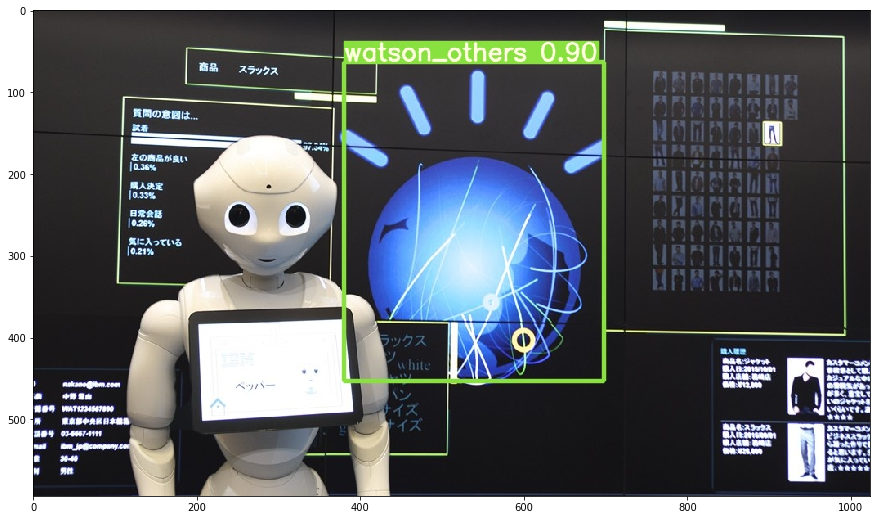

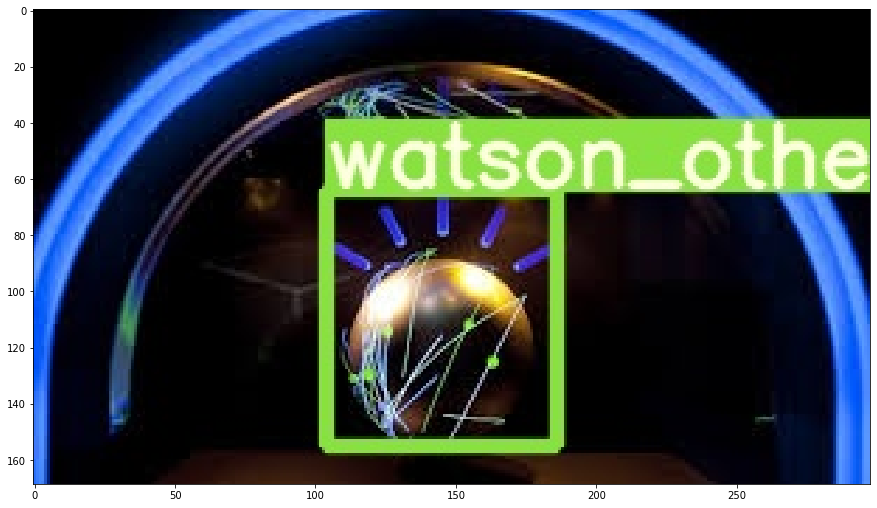

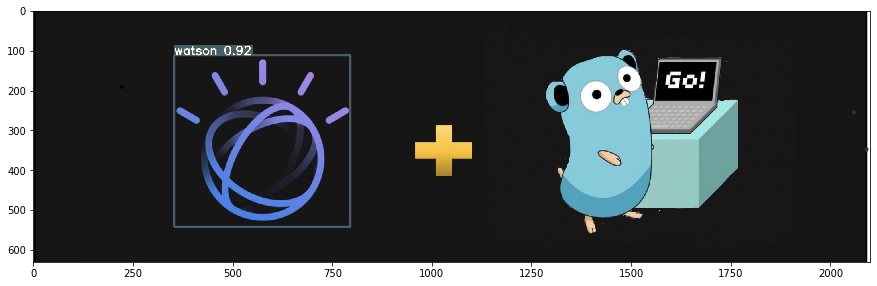

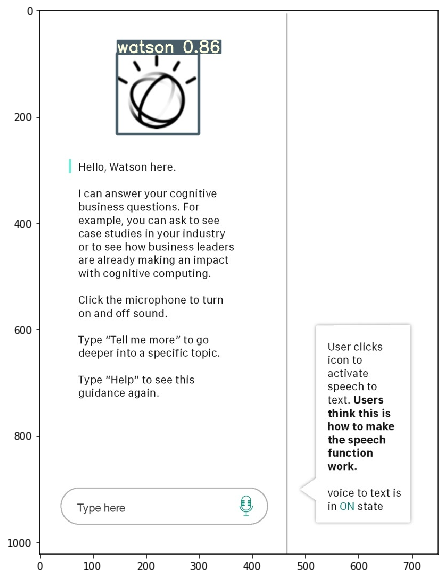

In [14]:
for imgfile in sorted(glob.glob('output/*.jpg')):
    img = cv2.imread(imgfile)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,10))
    plt.imshow(img)
    plt.show()